Accuracy of KMeans Clustering =  0.24
Confusion Matrix = 
 [[ 0 50  0]
 [48  0  2]
 [14  0 36]]

Accuracy of Gaussian Mixture =  0.03333333333333333
Confusion Matrix = 
 [[ 0  0 50]
 [45  5  0]
 [ 0 50  0]]


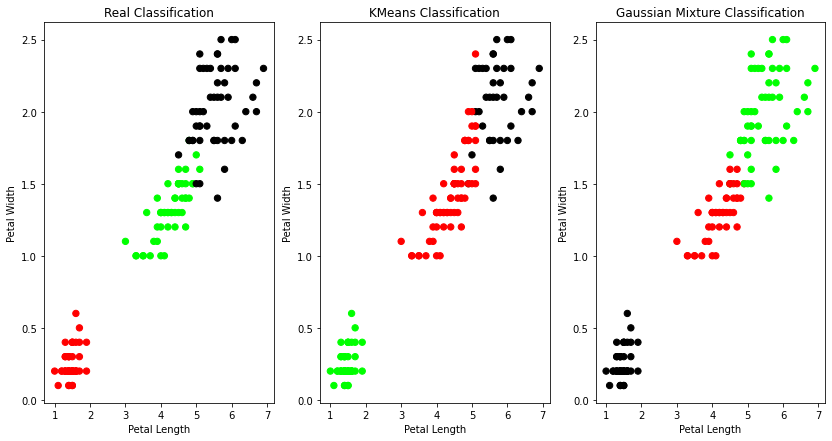

In [6]:
from sklearn import datasets
import sklearn.metrics as sm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

iris = datasets.load_iris()

X = pd.DataFrame(iris.data)
X.columns = ['Sepal_Length', 'Sepal_Width', 'Petal_Length', 'Petal_Width']

y = pd.DataFrame(iris.target)
y.columns = ['Targets']

colormap = np.array(['red', 'lime', 'black'])

plt.figure(figsize = (14,7))
plt.subplot(1,3,1)

plt.scatter(X.Petal_Length, X.Petal_Width, c = colormap[y.Targets], s = 40)
plt.title("Real Classification")
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")




from sklearn.cluster import KMeans
model = KMeans(n_clusters = 3)
model.fit(X)

plt.subplot(1,3,2)
plt.scatter(X.Petal_Length, X.Petal_Width, c = colormap[model.labels_], s = 40)

plt.title("KMeans Classification")
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")

print("Accuracy of KMeans Clustering = ", sm.accuracy_score(y, model.labels_))
print("Confusion Matrix = \n", sm.confusion_matrix(y, model.labels_))


from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components = 3)
gmm.fit(X)

y_gmm = gmm.predict(X)

plt.subplot(1,3,3)
plt.scatter(X.Petal_Length, X.Petal_Width, c = colormap[y_gmm], s = 40)

plt.title("Gaussian Mixture Classification")
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")

print("\nAccuracy of Gaussian Mixture = ", sm.accuracy_score(y, y_gmm))
print("Confusion Matrix = \n", sm.confusion_matrix(y, y_gmm))

